## Mathew: load preprocessed data from Cell Ranger and salmon

In [2]:
import numpy as np
import pandas as pd
import os
import scanpy as sc
import anndata as ad
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib_venn import venn2
from venny4py.venny4py import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

### read in data

In [4]:
cellranger = sc.read_h5ad("../data/processed_seurat_cellranger.h5ad")
salmon = sc.read_h5ad("../data/processed_seurat_salmon.h5ad")

In [5]:
# convert cluster annotations to str
cellranger.obs["cluster"] = cellranger.obs['HC_16'].astype("str")
salmon.obs["cluster"] = salmon.obs['HC_16'].astype("str")

### compare cellranger and salmon

In [6]:
# create colormap for UMAP

# list of HEX colors
hex_colors = ["#CD665F", "#BF781C", "#AB871D", "#92941D", "#77A119", "#57AA17", "#64B15A", "#5CB488",
              "#61AFB4", "#5AA6DC", "#5A91F8", "#7D7AFA", "#A760FA", "#C54FE4", "#CB4EC0", "#D3558E"]

# convert HEX colors to RGB
rgb_colors = [(int(color[1:3], 16)/255, int(color[3:5], 16)/255, int(color[5:7], 16)/255) for color in hex_colors]

# create colormap
cmap = ListedColormap(rgb_colors)

# create dictionary to assign colors to clusters
clusters = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16"]
umap_colors = {}
i = 0
for cluster in clusters:
    umap_colors[cluster] = cmap.colors[i]
    i+=1

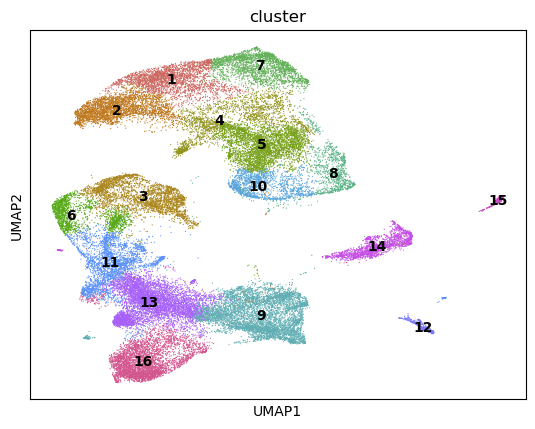

In [7]:
sc.pl.umap(cellranger, color="cluster", dimensions=(0,1), palette=umap_colors, legend_loc="on data")

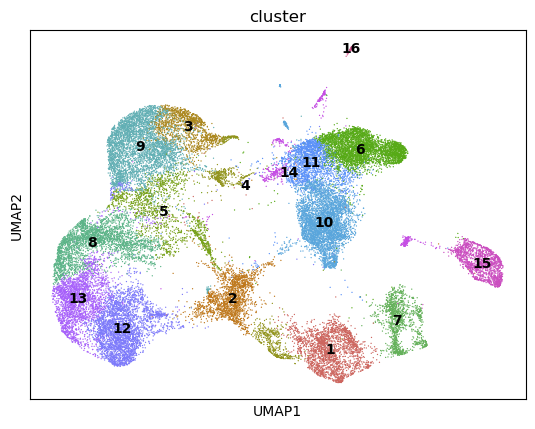

In [8]:
sc.pl.umap(salmon, color="cluster", dimensions=(0,1), palette=umap_colors, legend_loc="on data")

### cluster annotation

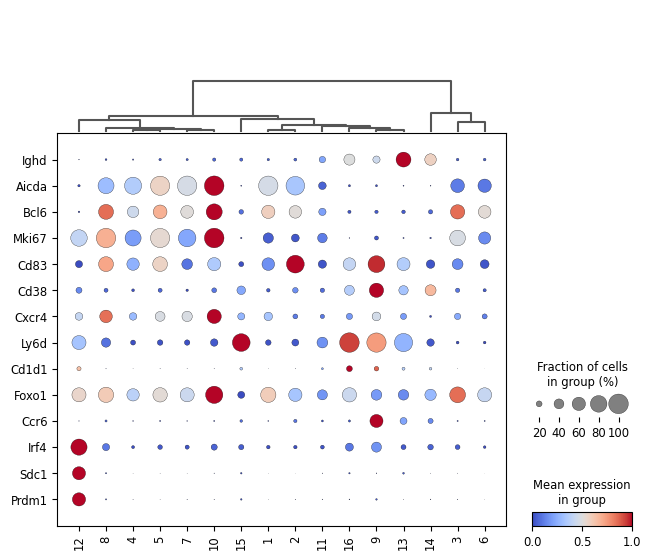

In [9]:
# markers described in Mathew et al. paper
markers = ["Ighd", "Aicda", "Bcl6", "Mki67", "Cd83", "Cd38", "Cxcr4", "Ly6d", "Cd1d1", "Foxo1", "Ccr6", "Irf4", "Sdc1", "Prdm1"]
sc.tl.dendrogram(cellranger, groupby="cluster", var_names=markers)
sc.pl.dotplot(cellranger, markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

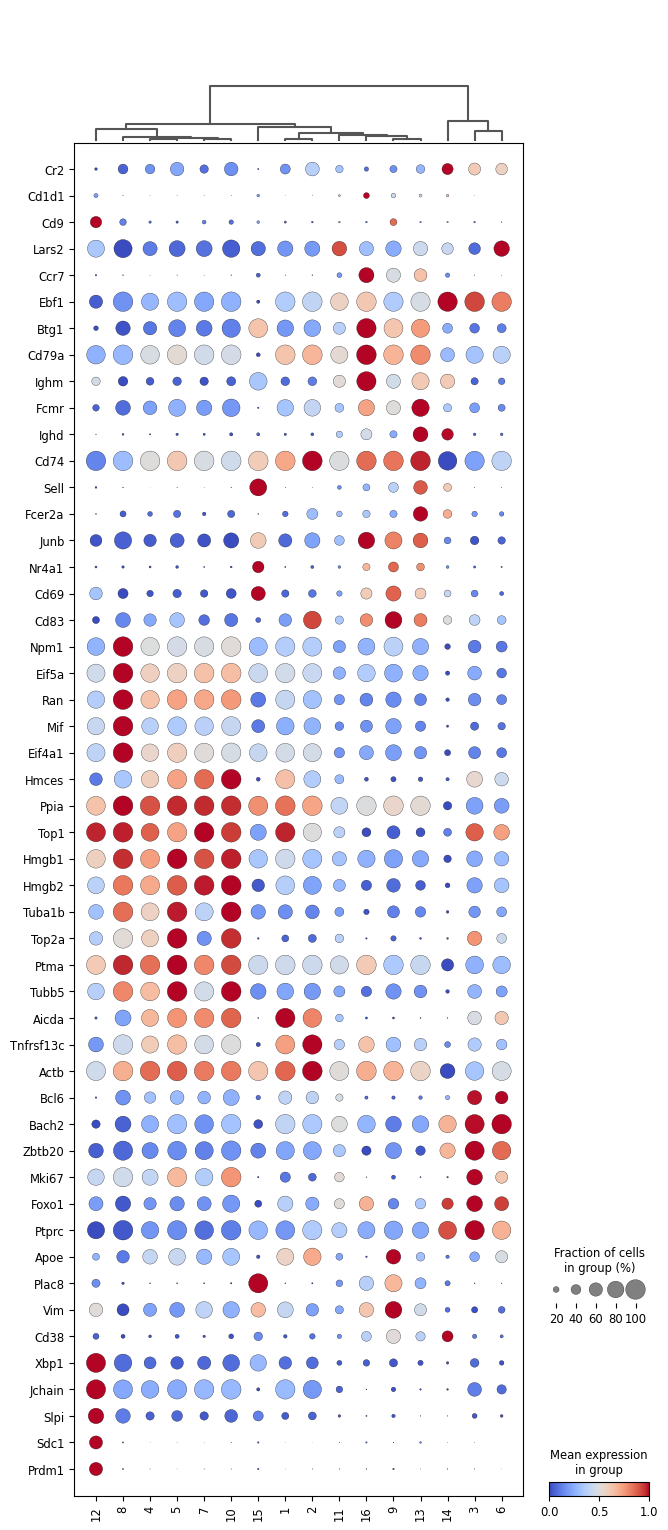

In [10]:
# markers of Fig1

markers = ["Cr2", "Cd1d1", "Cd9", "Lars2", "Ccr7", "Ebf1", "Btg1", "Cd79a", "Ighm", "Fcmr", "Ighd", "Cd74", 
           "Sell", "Fcer2a", "Junb", "Nr4a1", "Cd69", "Cd83", "Npm1", "Eif5a", "Ran", "Mif", "Eif4a1", 
           "Hmces", "Ppia", "Top1", "Hmgb1", "Hmgb2", "Tuba1b", "Top2a", "Ptma", "Tubb5", "Aicda", "Tnfrsf13c", 
           "Actb", "Bcl6", "Bach2", "Zbtb20", "Mki67", "Foxo1", "Ptprc", "Apoe", "Plac8", "Vim", "Cd38", "Xbp1", "Jchain", "Slpi", "Sdc1", "Prdm1"]

sc.tl.dendrogram(cellranger, groupby="cluster", var_names=markers)
sc.pl.dotplot(cellranger, markers, groupby='cluster', cmap="coolwarm", standard_scale="var", dendrogram=True, swap_axes=True)

#### Naive

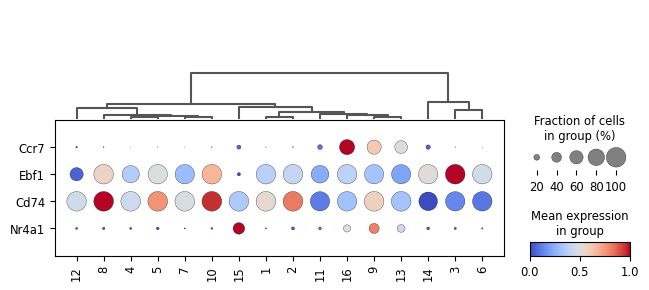

In [11]:
# markers: Ccr7, Ebf1, Cd74, and Nr4a1 (Nur77)
naive_markers = ["Ccr7", "Ebf1", "Cd74", "Nr4a1"]

sc.pl.dotplot(cellranger, naive_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> Naive: 16, 9, 13

#### Plasma B cells

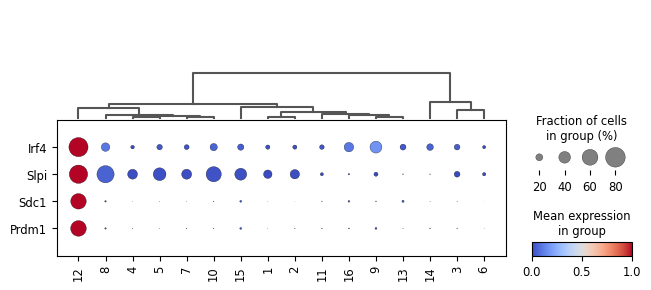

In [12]:
# markers: Irf4, Slpi, Sdc1, and Prdm1
pb_markers = ["Irf4", "Slpi", "Sdc1", "Prdm1"]

sc.pl.dotplot(cellranger, pb_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 12

#### Marginal zone

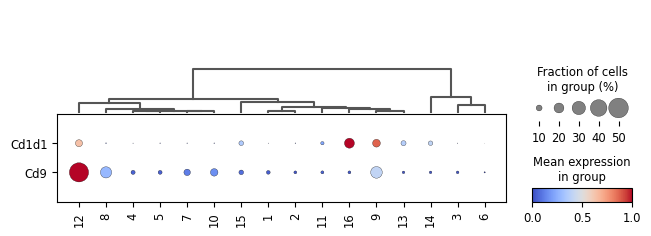

In [13]:
# markers: Cd1d1 and Cd9
mz_markers = ["Cd1d1", "Cd9"]

sc.pl.dotplot(cellranger, mz_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 14

#### Memory

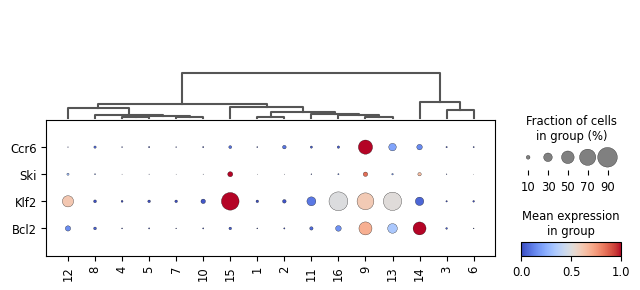

In [14]:
# marker expression
mem_markers = ["Ccr6", "Ski", "Klf2", "Bcl2"]

sc.pl.dotplot(cellranger, mem_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 15

#### Pre-Memory

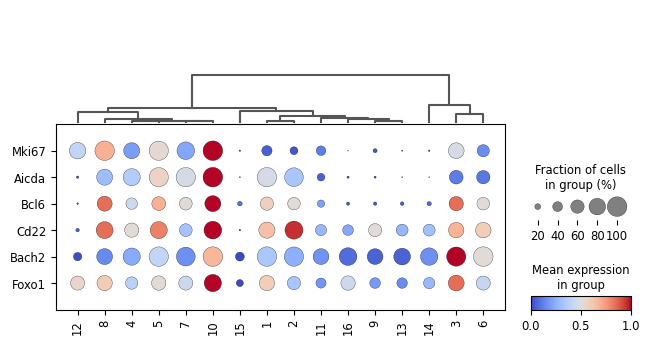

In [15]:
# markers: Mki67, Aicda, Bcl6, Cd22, Bach2, and Foxo1

pre_markers = ["Mki67", "Aicda", "Bcl6", "Cd22", "Bach2", "Foxo1"]
sc.pl.dotplot(cellranger, pre_markers, groupby='cluster', cmap="coolwarm", 
              layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 6

#### Germinal center cells

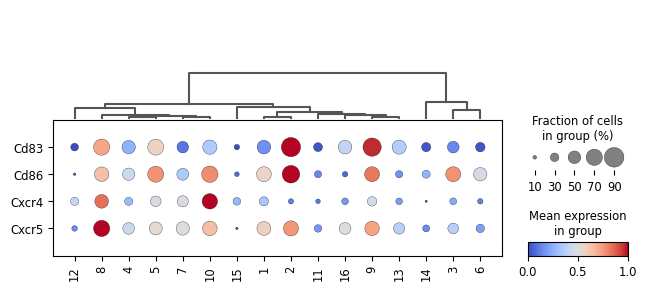

In [16]:
# gc cells
gc_markers = ["Cd83", "Cd86", "Cxcr4", "Cxcr5"]
# ["Foxp1", "Tcf3", "Hmmr", "Il4i1", "Nfkbia", "Irf4", "Cd69", "Socs3", "Bcl2a1a", "Myc", "Egr1", "Egr2", "Plscr1", "Lifr", "S1pr3", "Slamf1", "Ptger4", "Cd40", "Ccr6", "Gpr183"]
sc.pl.dotplot(cellranger, gc_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

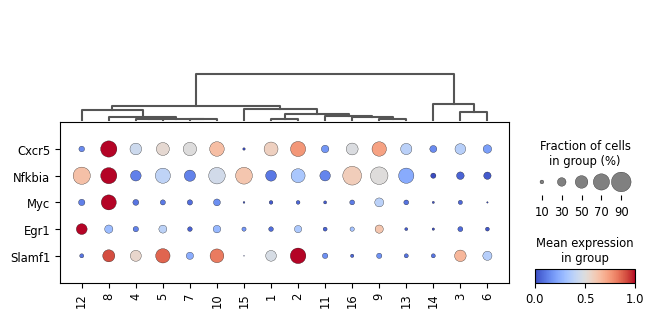

In [17]:
# GC light zone

# ["Cxcr5", "Nfkbia", "Myc", "Egr1", "Egr2","Irf4", "Cd69", "Socs3", "Cd83", "Bcl2a1a", 
#              "Plscr1", "Lifr", "S1pr3", "Slamf1", "Ptger4", "Cd40", "Ccr6", "Gpr183"]

lz_markers = ["Cxcr5", "Nfkbia", "Myc", "Egr1", "Slamf1"]
sc.pl.dotplot(cellranger, lz_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 1, 2 and 3

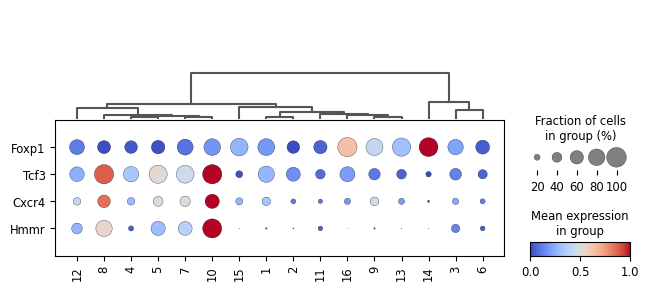

In [18]:
# GC dark zone
dz_markers = ["Foxp1", "Tcf3", "Cxcr4", "Hmmr"]
sc.pl.dotplot(cellranger, dz_markers, groupby='cluster', cmap="coolwarm", layer="counts", standard_scale="var", dendrogram=True, swap_axes=True)

--> cluster 10, 4, 7, 5

--> S-phase: cluster 4 and 5 \
--> G2M phase: cluster 7 and 10

### final annotation of clusters

In [20]:
cellranger.obs["cluster"].replace("16", "C1", inplace=True)
cellranger.obs["cluster"].replace("13", "C2", inplace=True)
cellranger.obs["cluster"].replace("11", "C3", inplace=True)
cellranger.obs["cluster"].replace("9", "C4", inplace=True)
cellranger.obs["cluster"].replace("15", "C5", inplace=True)
cellranger.obs["cluster"].replace("14", "C6", inplace=True)
cellranger.obs["cluster"].replace("12", "C7", inplace=True)
cellranger.obs["cluster"].replace("5", "C8", inplace=True)
cellranger.obs["cluster"].replace("6", "C9", inplace=True)
cellranger.obs["cluster"].replace("4", "C10", inplace=True)
cellranger.obs["cluster"].replace("3", "C11", inplace=True)
cellranger.obs["cluster"].replace("2", "C12", inplace=True)
cellranger.obs["cluster"].replace("1", "C13", inplace=True)
cellranger.obs["cluster"].replace("8", "C14", inplace=True)
cellranger.obs["cluster"].replace("7", "C15", inplace=True)
cellranger.obs["cluster"].replace("10", "C16", inplace=True)

### UMAP

In [19]:
# create colormap for UMAP

# list of HEX colors
hex_colors = ["#CD665F", "#BF781C", "#AB871D", "#92941D", "#77A119", "#57AA17", "#64B15A", "#5CB488",
              "#61AFB4", "#5AA6DC", "#5A91F8", "#7D7AFA", "#A760FA", "#C54FE4", "#CB4EC0", "#D3558E"]

# convert HEX colors to RGB
rgb_colors = [(int(color[1:3], 16)/255, int(color[3:5], 16)/255, int(color[5:7], 16)/255) for color in hex_colors]

# create colormap
cmap = ListedColormap(rgb_colors)

# create dictionary to assign colors to clusters
clusters = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16"]
umap_colors = {}
i = 0
for cluster in clusters:
    umap_colors[cluster] = cmap.colors[i]
    i+=1

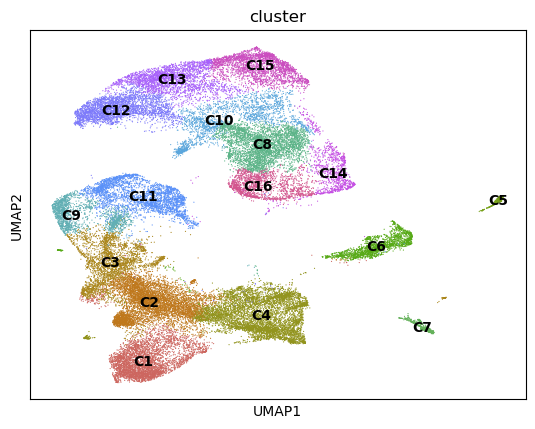

In [21]:
sc.pl.umap(cellranger, color="cluster", dimensions=(0,1), palette=umap_colors, legend_loc="on data")

### subset data by intersection of processed cellranger and salmon

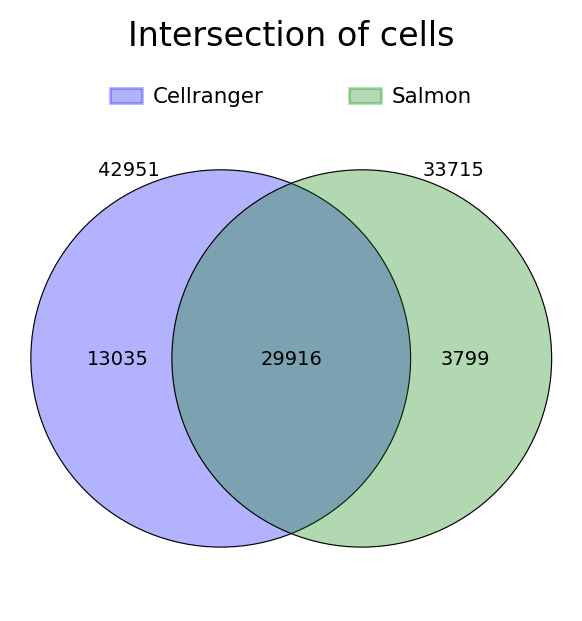

In [20]:
# get intersection of cells
venny4py({"Cellranger": set(cellranger.obs_names.tolist()),
         "Salmon": set(salmon.obs_names.tolist())})
plt.title("Intersection of cells");

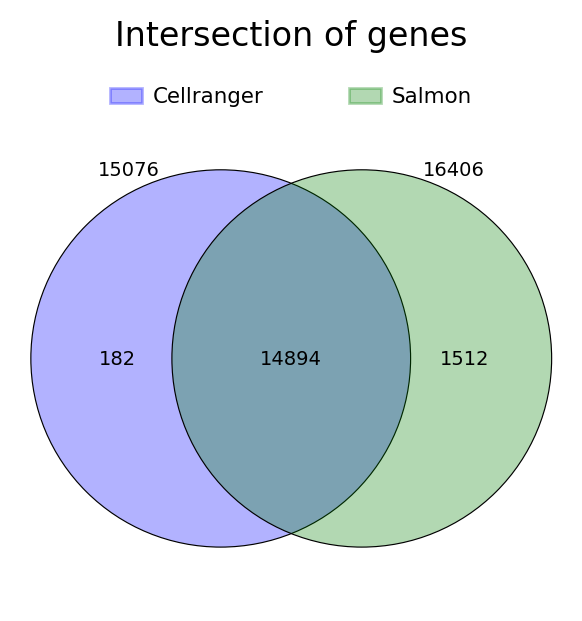

In [21]:
# get intersection of genes
venny4py({"Cellranger": set(cellranger.var_names.tolist()),
         "Salmon": set(salmon.var_names.tolist())})
plt.title("Intersection of genes");

In [22]:
# subset
common_cells = list(set(cellranger.obs_names.tolist()).intersection(salmon.obs_names.tolist()))
common_genes = list(set(cellranger.var_names.tolist()).intersection(salmon.var_names.tolist()))

cellranger_subset = cellranger[common_cells, common_genes]
salmon_subset = salmon[common_cells, common_genes]

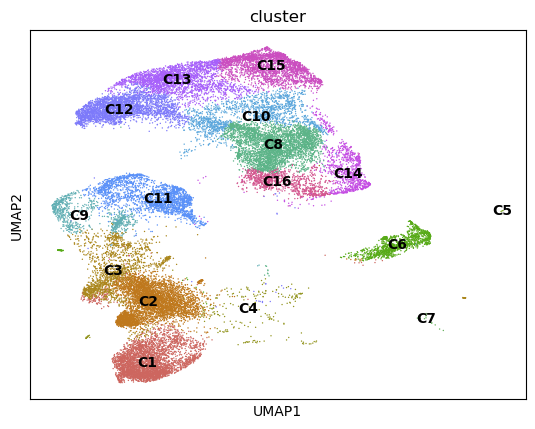

In [23]:
# plot remaining cells
sc.pl.umap(cellranger_subset, color="cluster", dimensions=(0,1), palette=umap_colors, legend_loc="on data")

--> many cells of clusters 4, 7 and 5 missing 

### add layers, obs and var to salmon

In [24]:
# get unprocessed salmon data
salmon_raw = sc.read_h5ad("../data/mathew_salmon_raw.h5ad")
salmon_raw.var_names_make_unique()

In [25]:
# get common cells and genes with processed salmon
salmon_raw = salmon_raw[salmon_subset.obs_names, salmon_subset.var_names]

In [26]:
# add u + s + a counts
salmon_subset.layers["unspliced"] = salmon_raw.layers["unspliced"]
salmon_subset.layers["spliced"] = salmon_raw.layers["spliced"]
salmon_subset.layers["ambiguous"] = salmon_raw.layers["ambiguous"]

In [28]:
# get same clusters, HVGs, PCs, neighborhood graph, UMAP as in cellranger
salmon_subset.obs["cluster"] = cellranger_subset.obs["cluster"]

salmon_subset.var["vst.variable"] = cellranger_subset.var["vst.variable"]
salmon_subset.var["highly_variable"] = cellranger_subset.var["highly_variable"]

salmon_subset.uns["pca"] = cellranger_subset.uns["pca"]
salmon_subset.obsm["X_pca"] = cellranger_subset.obsm["X_pca"]

cellranger_subset.obsp["connectivities"] = cellranger_subset.obsp["SNN"]
salmon_subset.obsp["connectivities"] = cellranger_subset.obsp["connectivities"]

salmon_subset.obsm["X_mnn"] = cellranger_subset.obsm["X_mnn"]

salmon_subset.obsm["X_umap"] = cellranger_subset.obsm["X_umap"]

### save

In [29]:
cellranger_subset.write_h5ad("../data/mathew_cellranger.h5ad")
salmon_subset.write_h5ad("../data/mathew_salmon.h5ad")